In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [3]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('./diagnosis.csv')
dataset = pd_dat.values

In [4]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [5]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [6]:
# Build the input layers
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras import Model


shape_inputs = (1,)
temperature = Input(shape = shape_inputs, name = "temp")
nausea_occurence = Input(shape = shape_inputs, name = "nocc")
lumbar_pain = Input(shape = shape_inputs, name = "lumbp")
urine_pushing = Input(shape = shape_inputs, name = "up")
micturition_pains = Input(shape = shape_inputs, name = "mict")
bis = Input(shape = shape_inputs, name = "bis")

In [7]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [8]:
# Merge all input features into a single large vector
x = Concatenate()(list_inputs)


In [9]:
# Use a logistic regression classifier for disease prediction
inflammation_pred = Dense(1, activation = "sigmoid", name = "inflam")(x)
nephritis_pred = Dense(1, activation = "sigmoid", name = "nephr")(x)


In [10]:
# Create a list of all the outputs
list_outputs = [inflammation_pred, nephritis_pred]

In [11]:
# Create the model object
model = Model(inputs = list_inputs, outputs = list_outputs)


#### Plot the model

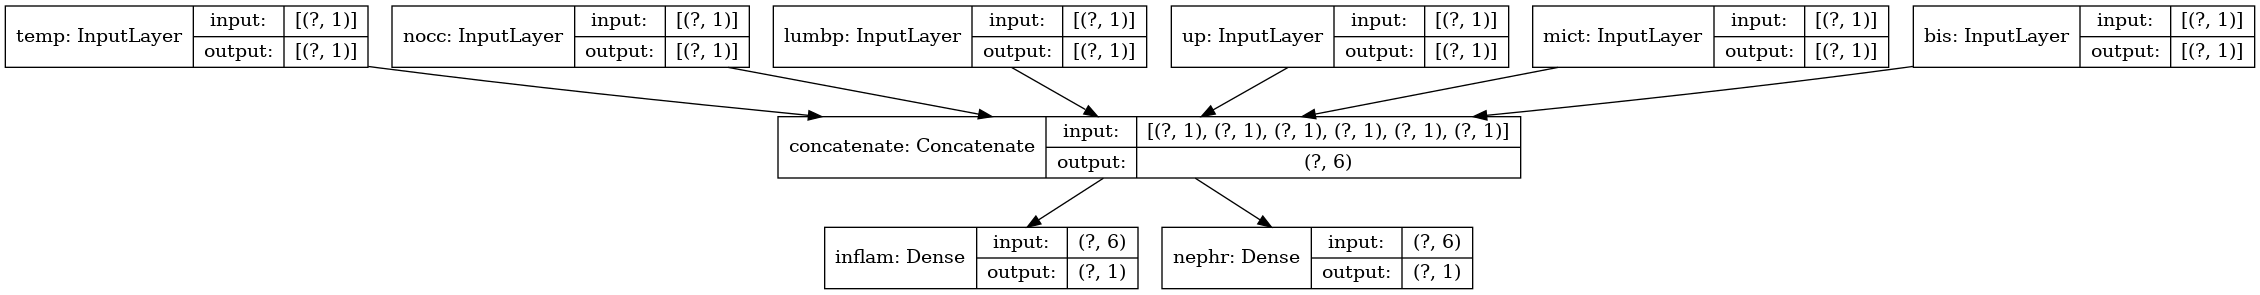

In [12]:
# Display the multiple input/output model
tf.keras.utils.plot_model(model,"multi_input_output_model.png", show_shapes=True)

#### Compile the model

In [13]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3), loss =["binary_crossentropy","binary_crossentropy"], loss_weights=[.5,.5]  ,          metrics=["accuracy"])

#### Fit the model 

In [14]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [15]:
# Train the model
history = model.fit(inputs_train, outputs_train,epochs=1000)


Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.2354 - inflam_loss: 5.0261 - nephr_loss: 13.4447 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.0929 - inflam_loss: 4.8829 - nephr_loss: 13.3029 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.9933 - inflam_loss: 4.7829 - nephr_loss: 13.2037 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.9093 - inflam_loss: 4.7000 - nephr_loss: 13.1185 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.8301 - inflam_loss: 4.6247 - nephr_loss: 13.0354 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.7546 - inflam_loss: 4.5503 - nephr_loss: 12.9588 - infla

3/3 [==============================] - 0s 3ms/step - loss: 6.0433 - inflam_loss: 1.8935 - nephr_loss: 10.1931 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 48/1000
3/3 [==============================] - 0s 3ms/step - loss: 5.9807 - inflam_loss: 1.8330 - nephr_loss: 10.1283 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 49/1000
3/3 [==============================] - 0s 3ms/step - loss: 5.9159 - inflam_loss: 1.7703 - nephr_loss: 10.0615 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 50/1000
3/3 [==============================] - 0s 3ms/step - loss: 5.8515 - inflam_loss: 1.7111 - nephr_loss: 9.9919 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 51/1000
3/3 [==============================] - 0s 3ms/step - loss: 5.7881 - inflam_loss: 1.6517 - nephr_loss: 9.9244 - inflam_accuracy: 0.4750 - nephr_accuracy: 0.4375
Epoch 52/1000
3/3 [==============================] - 0s 3ms/step - loss: 5.7234 - inflam_loss: 1.5914 - nephr_loss: 9.8554 - inflam_accuracy:

3/3 [==============================] - 0s 3ms/step - loss: 3.8049 - inflam_loss: 0.5496 - nephr_loss: 7.0601 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 95/1000
3/3 [==============================] - 0s 4ms/step - loss: 3.7709 - inflam_loss: 0.5490 - nephr_loss: 6.9928 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 96/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.7399 - inflam_loss: 0.5534 - nephr_loss: 6.9264 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 97/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.7030 - inflam_loss: 0.5460 - nephr_loss: 6.8600 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 98/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.6682 - inflam_loss: 0.5448 - nephr_loss: 6.7916 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 99/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.6339 - inflam_loss: 0.5441 - nephr_loss: 6.7237 - inflam_accuracy: 0.

3/3 [==============================] - 0s 3ms/step - loss: 2.2512 - inflam_loss: 0.5005 - nephr_loss: 4.0019 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 141/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.2182 - inflam_loss: 0.4996 - nephr_loss: 3.9368 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 142/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.1852 - inflam_loss: 0.4984 - nephr_loss: 3.8721 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 143/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.1505 - inflam_loss: 0.4980 - nephr_loss: 3.8029 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 144/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.1149 - inflam_loss: 0.4964 - nephr_loss: 3.7335 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 145/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.0817 - inflam_loss: 0.4970 - nephr_loss: 3.6664 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.8363 - inflam_loss: 0.4559 - nephr_loss: 1.2167 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 187/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.8189 - inflam_loss: 0.4568 - nephr_loss: 1.1810 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 188/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.7998 - inflam_loss: 0.4545 - nephr_loss: 1.1452 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 189/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7849 - inflam_loss: 0.4529 - nephr_loss: 1.1169 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 190/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7699 - inflam_loss: 0.4520 - nephr_loss: 1.0878 - inflam_accuracy: 0.7750 - nephr_accuracy: 0.4375
Epoch 191/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.7553 - inflam_loss: 0.4519 - nephr_loss: 1.0587 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.6207 - inflam_loss: 0.4168 - nephr_loss: 0.8246 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 233/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6194 - inflam_loss: 0.4168 - nephr_loss: 0.8220 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 234/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6179 - inflam_loss: 0.4157 - nephr_loss: 0.8202 - inflam_accuracy: 0.8875 - nephr_accuracy: 0.3875
Epoch 235/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6174 - inflam_loss: 0.4157 - nephr_loss: 0.8191 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.3875
Epoch 236/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6153 - inflam_loss: 0.4138 - nephr_loss: 0.8168 - inflam_accuracy: 0.9375 - nephr_accuracy: 0.3875
Epoch 237/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6141 - inflam_loss: 0.4134 - nephr_loss: 0.8149 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.5718 - inflam_loss: 0.3823 - nephr_loss: 0.7613 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 279/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5713 - inflam_loss: 0.3819 - nephr_loss: 0.7607 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 280/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5696 - inflam_loss: 0.3819 - nephr_loss: 0.7573 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 281/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5679 - inflam_loss: 0.3804 - nephr_loss: 0.7555 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 282/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5670 - inflam_loss: 0.3798 - nephr_loss: 0.7542 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.3875
Epoch 283/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5670 - inflam_loss: 0.3790 - nephr_loss: 0.7550 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.5263 - inflam_loss: 0.3506 - nephr_loss: 0.7019 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 325/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5255 - inflam_loss: 0.3498 - nephr_loss: 0.7011 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5125
Epoch 326/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5244 - inflam_loss: 0.3497 - nephr_loss: 0.6991 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.4750
Epoch 327/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5243 - inflam_loss: 0.3500 - nephr_loss: 0.6986 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5125
Epoch 328/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5230 - inflam_loss: 0.3475 - nephr_loss: 0.6985 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.4875
Epoch 329/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5214 - inflam_loss: 0.3477 - nephr_loss: 0.6951 - inflam_accurac

3/3 [==============================] - 0s 4ms/step - loss: 0.4850 - inflam_loss: 0.3218 - nephr_loss: 0.6482 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 371/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4847 - inflam_loss: 0.3215 - nephr_loss: 0.6478 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 372/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4841 - inflam_loss: 0.3210 - nephr_loss: 0.6473 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 373/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4829 - inflam_loss: 0.3205 - nephr_loss: 0.6454 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 374/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4822 - inflam_loss: 0.3197 - nephr_loss: 0.6447 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.4625
Epoch 375/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4807 - inflam_loss: 0.3191 - nephr_loss: 0.6424 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.4481 - inflam_loss: 0.2962 - nephr_loss: 0.6000 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5625
Epoch 417/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4473 - inflam_loss: 0.2958 - nephr_loss: 0.5988 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5500
Epoch 418/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4460 - inflam_loss: 0.2951 - nephr_loss: 0.5970 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 419/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4455 - inflam_loss: 0.2955 - nephr_loss: 0.5955 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5375
Epoch 420/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4444 - inflam_loss: 0.2942 - nephr_loss: 0.5946 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.5625
Epoch 421/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4436 - inflam_loss: 0.2940 - nephr_loss: 0.5932 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.4129 - inflam_loss: 0.2729 - nephr_loss: 0.5530 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 463/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4120 - inflam_loss: 0.2724 - nephr_loss: 0.5515 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 464/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4112 - inflam_loss: 0.2717 - nephr_loss: 0.5507 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 465/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4107 - inflam_loss: 0.2711 - nephr_loss: 0.5504 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 466/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4100 - inflam_loss: 0.2708 - nephr_loss: 0.5492 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 467/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4105 - inflam_loss: 0.2711 - nephr_loss: 0.5498 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.3831 - inflam_loss: 0.2530 - nephr_loss: 0.5133 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 509/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3814 - inflam_loss: 0.2520 - nephr_loss: 0.5109 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 510/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3805 - inflam_loss: 0.2521 - nephr_loss: 0.5089 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 511/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3795 - inflam_loss: 0.2510 - nephr_loss: 0.5081 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 512/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3789 - inflam_loss: 0.2508 - nephr_loss: 0.5069 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 513/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3788 - inflam_loss: 0.2499 - nephr_loss: 0.5078 - inflam_accurac

3/3 [==============================] - 0s 2ms/step - loss: 0.3534 - inflam_loss: 0.2342 - nephr_loss: 0.4726 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 555/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3527 - inflam_loss: 0.2339 - nephr_loss: 0.4715 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 556/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3522 - inflam_loss: 0.2337 - nephr_loss: 0.4708 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 557/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3509 - inflam_loss: 0.2319 - nephr_loss: 0.4699 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 558/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3504 - inflam_loss: 0.2319 - nephr_loss: 0.4689 - inflam_accuracy: 1.0000 - nephr_accuracy: 0.7750
Epoch 559/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3500 - inflam_loss: 0.2313 - nephr_loss: 0.4687 - inflam_accurac

3/3 [==============================] - 0s 2ms/step - loss: 0.3276 - inflam_loss: 0.2164 - nephr_loss: 0.4389 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 601/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3262 - inflam_loss: 0.2168 - nephr_loss: 0.4357 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 602/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3254 - inflam_loss: 0.2159 - nephr_loss: 0.4348 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 603/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3245 - inflam_loss: 0.2154 - nephr_loss: 0.4337 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 604/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3248 - inflam_loss: 0.2165 - nephr_loss: 0.4330 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 605/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3239 - inflam_loss: 0.2147 - nephr_loss: 0.4330 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.3033 - inflam_loss: 0.2013 - nephr_loss: 0.4053 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 647/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3022 - inflam_loss: 0.2014 - nephr_loss: 0.4031 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 648/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3019 - inflam_loss: 0.2011 - nephr_loss: 0.4028 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 649/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3020 - inflam_loss: 0.2008 - nephr_loss: 0.4031 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 650/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3019 - inflam_loss: 0.2001 - nephr_loss: 0.4036 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 651/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3014 - inflam_loss: 0.2004 - nephr_loss: 0.4024 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2817 - inflam_loss: 0.1876 - nephr_loss: 0.3759 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 693/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2819 - inflam_loss: 0.1876 - nephr_loss: 0.3762 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 694/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2808 - inflam_loss: 0.1869 - nephr_loss: 0.3747 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 695/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2802 - inflam_loss: 0.1866 - nephr_loss: 0.3738 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 696/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2819 - inflam_loss: 0.1890 - nephr_loss: 0.3747 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 697/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2794 - inflam_loss: 0.1865 - nephr_loss: 0.3724 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2627 - inflam_loss: 0.1757 - nephr_loss: 0.3497 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 739/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2623 - inflam_loss: 0.1754 - nephr_loss: 0.3493 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 740/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2624 - inflam_loss: 0.1754 - nephr_loss: 0.3494 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 741/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2619 - inflam_loss: 0.1751 - nephr_loss: 0.3487 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 742/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2615 - inflam_loss: 0.1752 - nephr_loss: 0.3478 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 743/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2618 - inflam_loss: 0.1760 - nephr_loss: 0.3476 - inflam_accurac

3/3 [==============================] - 0s 2ms/step - loss: 0.2453 - inflam_loss: 0.1648 - nephr_loss: 0.3259 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 785/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2455 - inflam_loss: 0.1651 - nephr_loss: 0.3259 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 786/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2448 - inflam_loss: 0.1643 - nephr_loss: 0.3253 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 787/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2441 - inflam_loss: 0.1648 - nephr_loss: 0.3235 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 788/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2435 - inflam_loss: 0.1641 - nephr_loss: 0.3230 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 789/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2432 - inflam_loss: 0.1638 - nephr_loss: 0.3227 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2285 - inflam_loss: 0.1541 - nephr_loss: 0.3029 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 831/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2283 - inflam_loss: 0.1541 - nephr_loss: 0.3025 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 832/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2281 - inflam_loss: 0.1537 - nephr_loss: 0.3025 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 833/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2273 - inflam_loss: 0.1535 - nephr_loss: 0.3012 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 834/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2274 - inflam_loss: 0.1540 - nephr_loss: 0.3008 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 835/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2268 - inflam_loss: 0.1533 - nephr_loss: 0.3003 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2145 - inflam_loss: 0.1453 - nephr_loss: 0.2837 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 877/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2140 - inflam_loss: 0.1462 - nephr_loss: 0.2818 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 878/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2134 - inflam_loss: 0.1455 - nephr_loss: 0.2814 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 879/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2125 - inflam_loss: 0.1443 - nephr_loss: 0.2806 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 880/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2123 - inflam_loss: 0.1442 - nephr_loss: 0.2803 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 881/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2122 - inflam_loss: 0.1447 - nephr_loss: 0.2797 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.2005 - inflam_loss: 0.1372 - nephr_loss: 0.2639 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 923/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2001 - inflam_loss: 0.1363 - nephr_loss: 0.2639 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 924/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1997 - inflam_loss: 0.1362 - nephr_loss: 0.2632 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 925/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1997 - inflam_loss: 0.1364 - nephr_loss: 0.2630 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 926/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1990 - inflam_loss: 0.1359 - nephr_loss: 0.2622 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 927/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1993 - inflam_loss: 0.1361 - nephr_loss: 0.2624 - inflam_accurac

3/3 [==============================] - 0s 3ms/step - loss: 0.1886 - inflam_loss: 0.1291 - nephr_loss: 0.2481 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 969/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1883 - inflam_loss: 0.1284 - nephr_loss: 0.2482 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 970/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1879 - inflam_loss: 0.1285 - nephr_loss: 0.2472 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 971/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1871 - inflam_loss: 0.1283 - nephr_loss: 0.2459 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 972/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1867 - inflam_loss: 0.1280 - nephr_loss: 0.2454 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000
Epoch 973/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1865 - inflam_loss: 0.1279 - nephr_loss: 0.2451 - inflam_accurac

#### Plot the learning curves

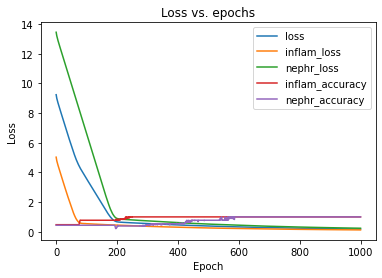

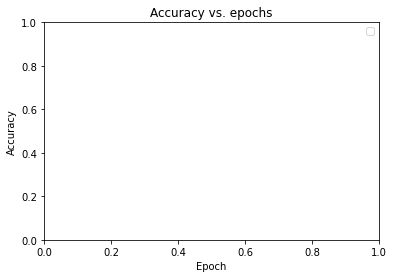

In [16]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [17]:
# Evaluate the model
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
              [inflam_test, nephr_test])


2/2 [==============================] - 0s 2ms/step - loss: 0.1817 - inflam_loss: 0.1371 - nephr_loss: 0.2263 - inflam_accuracy: 1.0000 - nephr_accuracy: 1.0000


[0.18169574439525604, 0.13707254827022552, 0.22631895542144775, 1.0, 1.0]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [18]:
import numpy as np

#### Create Variable objects

In [19]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [20]:
# Initialise a Variable value
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten

inputs = Input(shape=(16, 16, 3))
h = Conv2D(32, 3, activation='relu')(inputs)
h = AveragePooling2D(3)(h)
outputs = Flatten()(h)
Model = Model(inputs=inputs, outputs=outputs)

#### Use and modify Variable values

In [21]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.
print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [22]:
# Increment the value of a Variable
v.assign_add(1)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [23]:
# Decrement the value of a Variable
v.assign_sub(2)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-1.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [24]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [25]:
# Obtain the value as a numpy array
x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [26]:
# Create a Tensor of type float32
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9.]],dtype=tf.float32)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [27]:
# Create coefficients
coeffs = np.arange(16)

In [28]:
# Initialise shapes
shape1=[8,2]
shape2=[4,4]
shape3=[2,2,4]


In [29]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int64)


#### Useful Tensor operations

In [30]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [31]:
# Get the rank of a Tensor
rank=tf.rank(t)


In [32]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [33]:
# Reshape a Tensor
t2=tf.reshape(t,shape=(2,2,2,10))


In [34]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (2, 2, 2, 10)


In [35]:
# Create ones, zeros, identity and constant Tensors
ones = tf.ones(shape=(3,4))
zeros = tf.zeros(shape=(3,4))
eye = tf.eye(3)
tensor7 = tf.constant(7.0, shape = (3,4))

In [36]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]], shape=(3, 4), dtype=float32)


In [37]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [38]:
# Concatentate two Tensors
concat0 = tf.concat([t1,t2],axis = 0)
concat1 = tf.concat([t1,t2],axis = 1)

In [39]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [40]:
# Create a constant Tensor
t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [41]:
# Expanding the rank of Tensors
t1 = tf.expand_dims(t,axis=1)
t2 = tf.expand_dims(t,axis=2)
t3 = tf.expand_dims(t,axis=3)



In [42]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (3, 1, 2, 4) 
 t2 shape:  (3, 2, 1, 4) 
 t3 shape:  (3, 2, 4, 1)


In [43]:
# Squeezing redundant dimensions
tf.squeeze(t1)

<tf.Tensor: shape=(3, 2, 4), dtype=int64, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])>

In [44]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 1, 2, 4) 
 t2 shape:  (3, 2, 1, 4) 
 t3 shape:  (3, 2, 4, 1)


In [45]:
# Slicing a Tensor
x = tf.constant([1,2,3,4,5])
x[0:2]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

#### Doing maths with Tensors

In [46]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [47]:
# Matrix multiplication
matmul_cd=tf.matmul(c,d)


In [48]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [49]:
# Elementwise operations
c_times_d = c * d
c_plus_d = c + d
c_minus_d = c - d
c_div_c = c / c

In [50]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [51]:
# Create Tensors
a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [52]:
# Absolute value of a Tensor



In [53]:
# Power of a Tensor



#### Randomly sampled constant tensors

In [54]:
# Create a Tensor with samples from a Normal distribution
t = tf.random.uniform(shape = (200,100),minval=0.0, maxval=10.0)

In [55]:
# Create a Tensor with samples from a Uniform distribution

In [56]:
# Create a Tensor with samples from a Poisson distribution



In [58]:
# More maths operations

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [60]:
# Load the VGG19 model
from tensorflow.keras.applications import VGG19
vgg_model  = VGG19()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

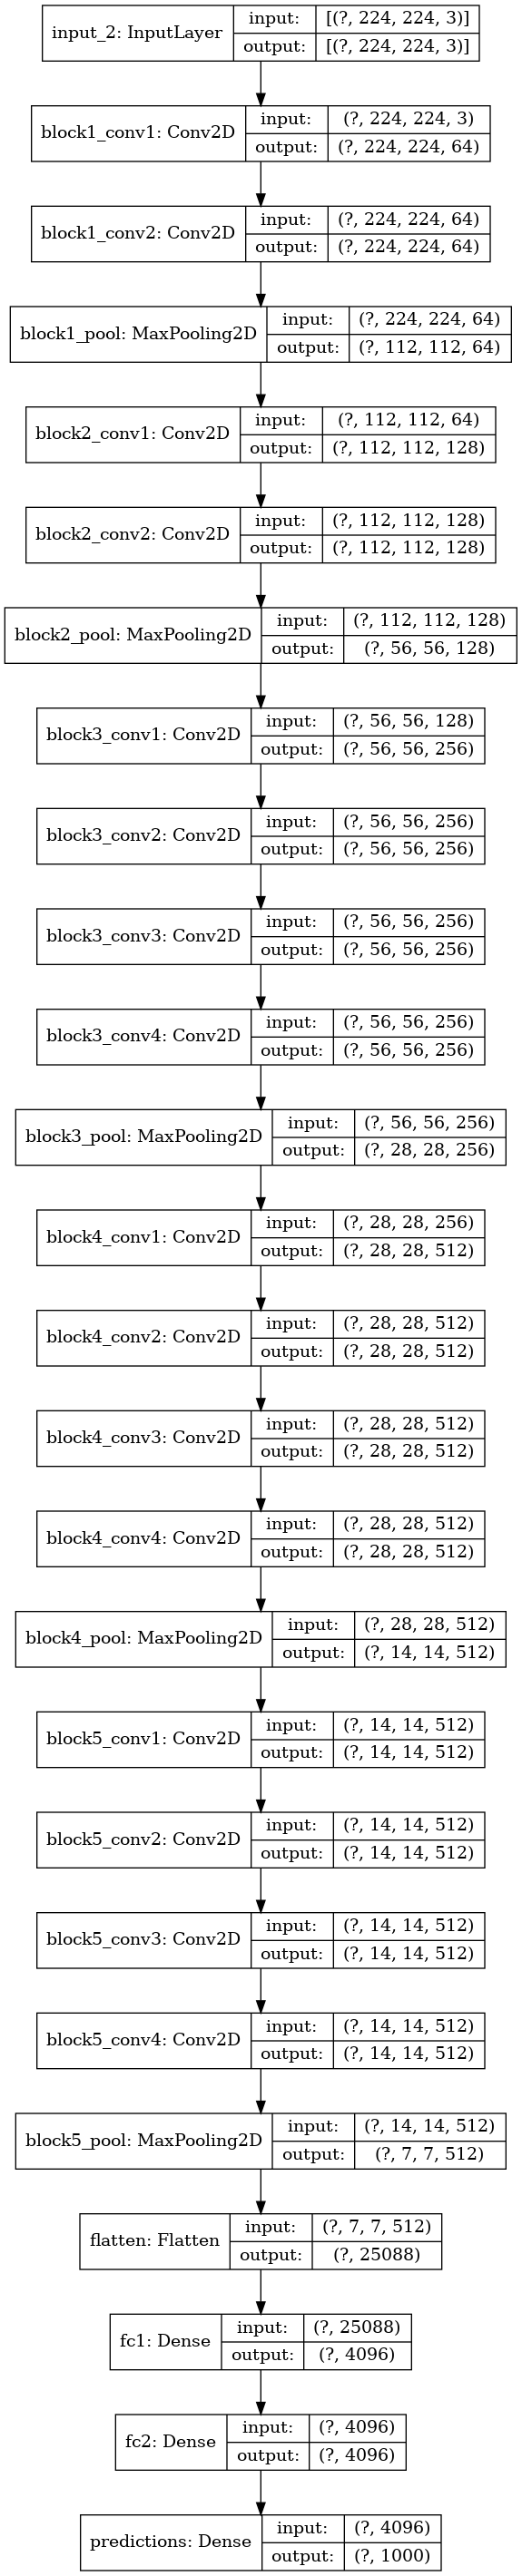

In [61]:
# Get the inputs, layers and display the summary
from tensorflow.keras.utils import plot_model


vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

plot_model(vgg_model,show_shapes=True)

#### Build a model to access the layer outputs

In [62]:
from tensorflow.keras.models import Model

In [63]:
# Build a model that returns the layer outputs

layer_outputs = [layer.output for layer in vgg_layers]
features = Model(inputs= [vgg_input], outputs = layer_outputs)

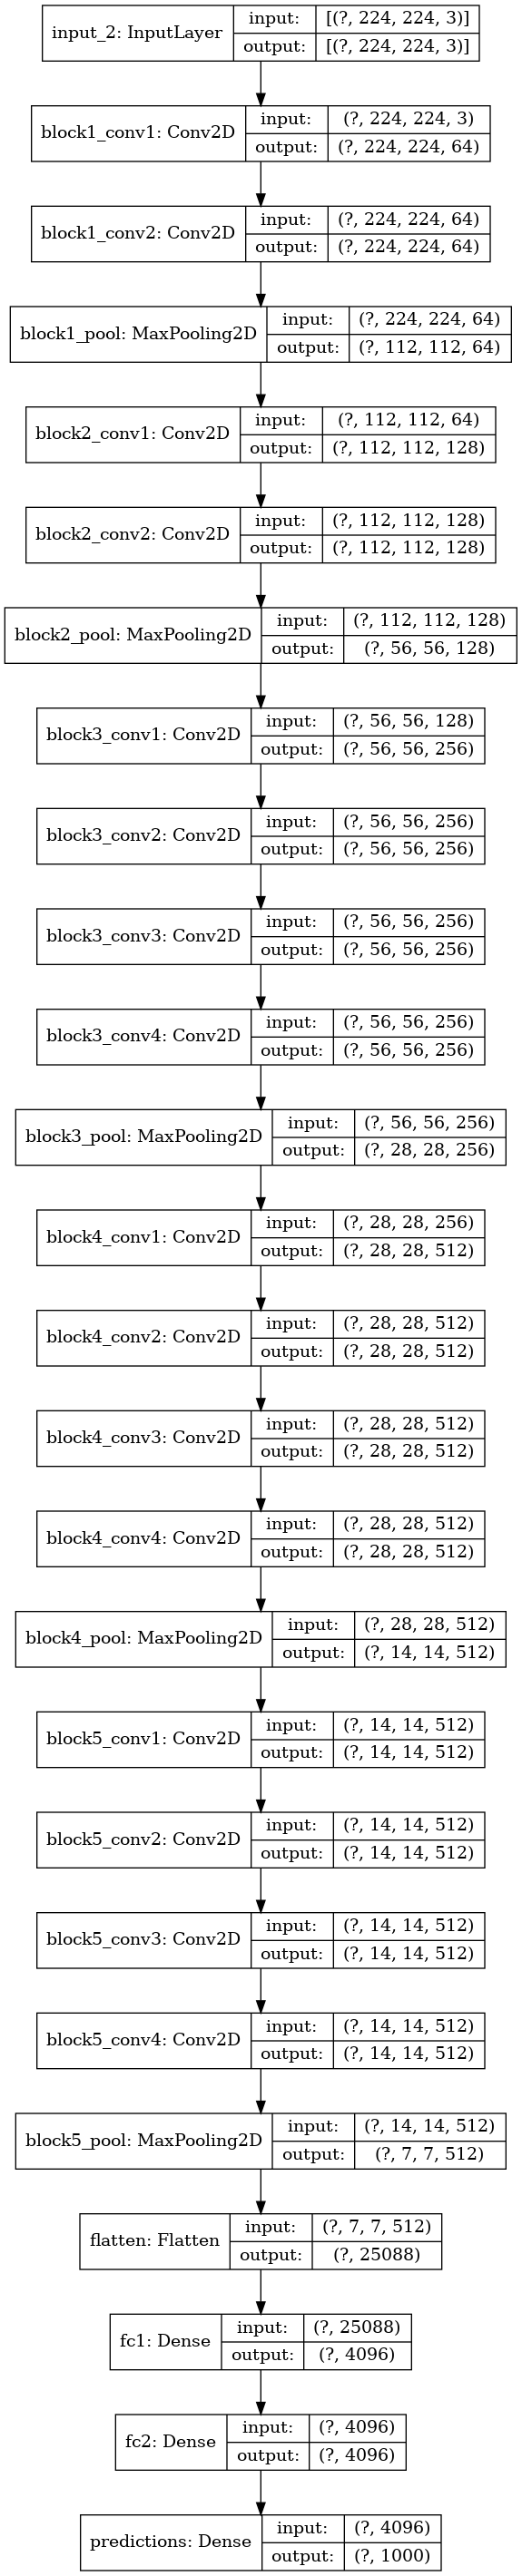

In [64]:
# Plot the model
plot_model(features,show_shapes=True)

In [65]:
# Test the model on a random input
img = np.random.random((1,224,224,3)).astype("float32")

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

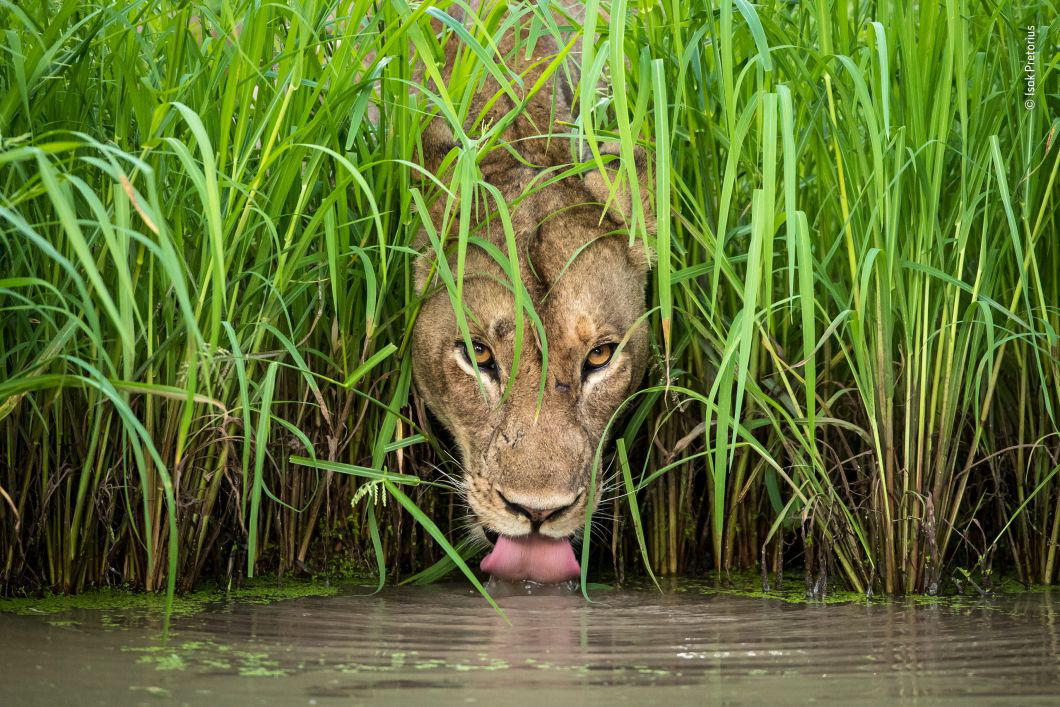

In [66]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('./cool_cat.jpg'))

#### Visualise network features from the input image

In [67]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = './cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [68]:
# Extract the features
extracted_features= features(x)



 f1.shape (1, 224, 224, 3)


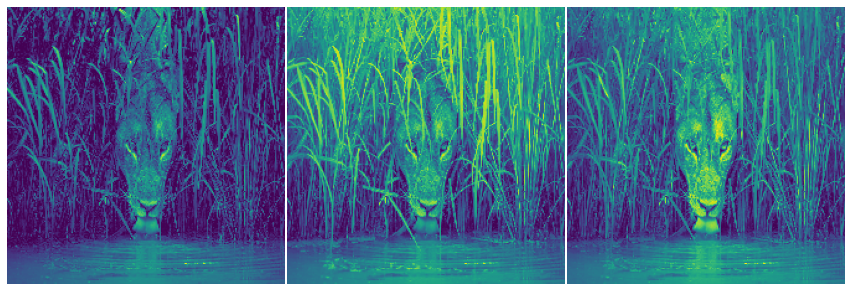

In [69]:
# Visualise the input channels
f1 = extracted_features[0]
print("\n f1.shape", f1.shape)
plt.figure(figsize=(15,15))
imgs = f1[0,:,:,:]
for n in range(3):
    ax = plt.subplot(1,3,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f1.shape (1, 224, 224, 64)


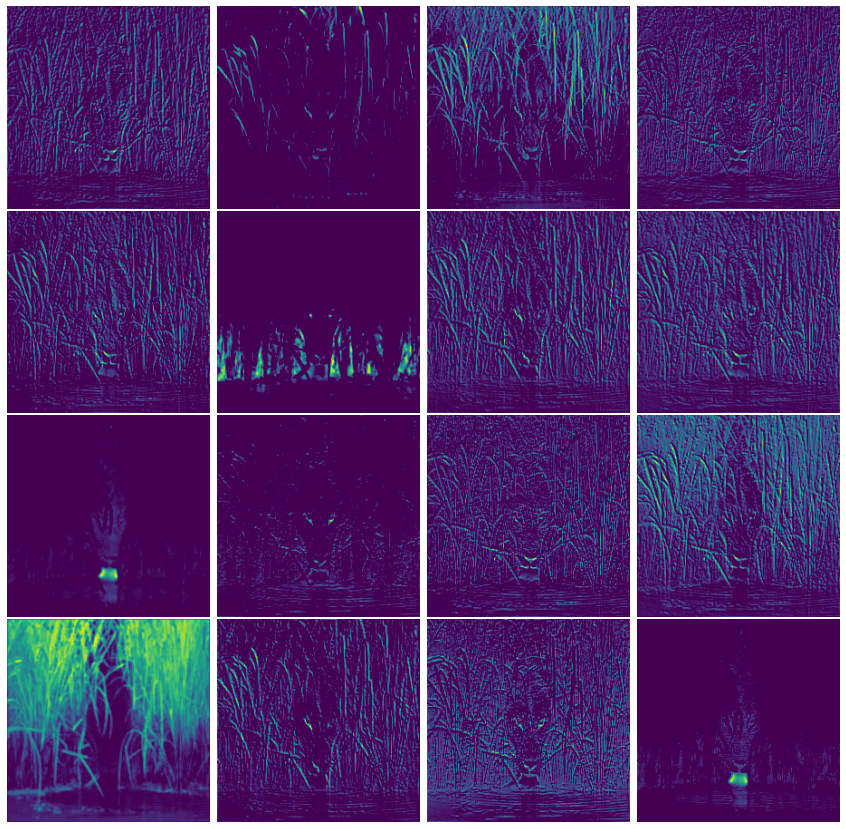

In [70]:
# Visualise some features in the first hidden layer
f1 = extracted_features[1]
print("\n f1.shape", f1.shape)
plt.figure(figsize=(15,15))
imgs = f1[0,:,:,:]
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


In [71]:
# Build a model to extract features by layer name
from tensorflow.keras.models import Model


extract_block1_pool = Model(inputs = features.input, outputs = features.get_layer("block1_pool").output)
# features = Model(inputs= [vgg_input], outputs = layer_outputs)


 f1.shape (112, 112, 64)


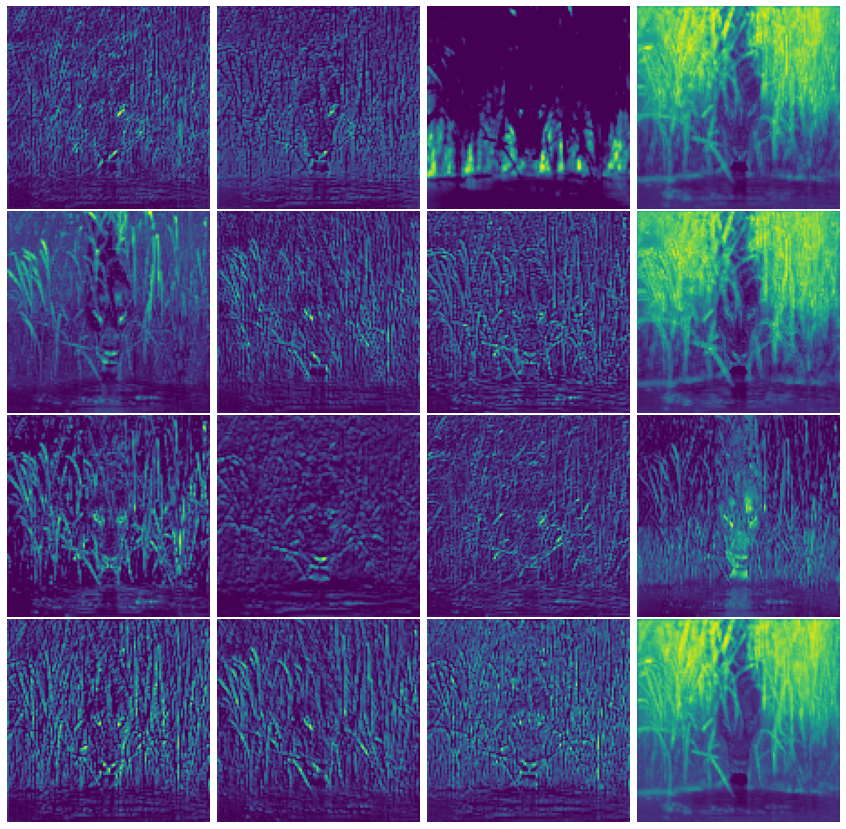

In [72]:
# Visualise some features from the extracted layer output
f1 = extract_block1_pool(x)[0]
print("\n f1.shape", f1.shape)
plt.figure(figsize=(15,15))
imgs = f1[:,:,:]
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [73]:
# Extract features from a layer deeper in the network
extract_block1_pool = Model(inputs = features.input, outputs = features.get_layer("block5_conv4").output)
# features = Model(inputs= [vgg_input], outputs = layer_outputs)


 f1.shape (14, 14, 512)


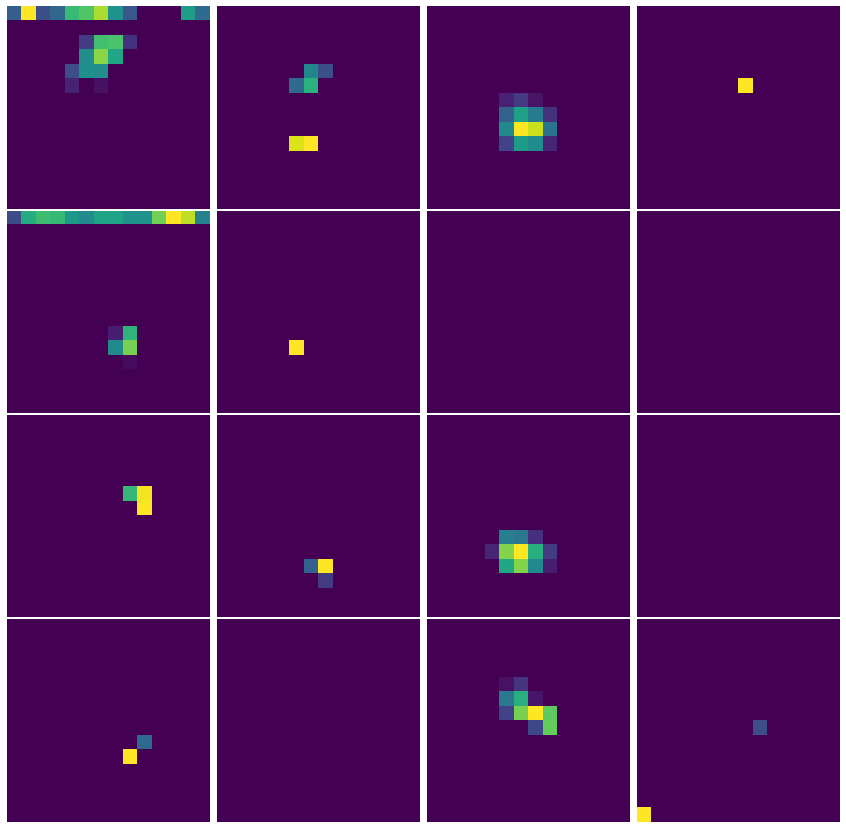

In [74]:
# Visualise some features from the extracted layer output
f5 = extract_block1_pool(x)[0]
print("\n f1.shape", f5.shape)
plt.figure(figsize=(15,15))
imgs = f5[:,:,:]
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis("off")
plt.subplots_adjust(wspace=0.01, hspace=0.01)


***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [105]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [106]:
# Display the model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [107]:
# Retrieve the weights and biases
import copy

def get_model_weights_bias(model):
    W0_layers = [copy.deepcopy(e.weights[0]) for e in model.layers]
    b0_layers = [copy.deepcopy(e.bias) for e in model.layers]
    return (W0_layers, b0_layers)

    

(W0_layers,b0_layers) = get_model_weights_bias(model)


In [108]:
# Construct a synthetic dataset
x_train = np.random.random((100, 4))
y_train = x_train
x_test = np.random.random((20, 4))
y_test = x_test

In [109]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])
model.fit(x_train, y_train, epochs=50, verbose=False);

In [110]:
# Retrieve weights and biases
(W1_layers,b1_layers) = get_model_weights_bias(model)



tf.Tensor(
[[ 0.07416835 -0.08664227 -0.06671456 -0.07595849]
 [-0.00403652 -0.07801911 -0.00280543 -0.00398094]
 [-0.10054798 -0.04996229  0.09284085  0.09522224]
 [ 0.14308889 -0.07552981 -0.12882194 -0.1377512 ]], shape=(4, 4), dtype=float32)
Layer 0: bias variation:  0.13467579
tf.Tensor(
[[-0.1043421  -0.03671497]
 [-0.08897626 -0.03387659]
 [-0.08478373 -0.04489976]
 [-0.08728683 -0.04101804]], shape=(4, 2), dtype=float32)
Layer 1: bias variation:  0.1035129
tf.Tensor(
[[ 0.16774595  0.06177014 -0.06763375 -0.03643158]
 [ 0.19102429  0.0581894  -0.08718087 -0.033759  ]], shape=(2, 4), dtype=float32)
Layer 2: bias variation:  0.22373053


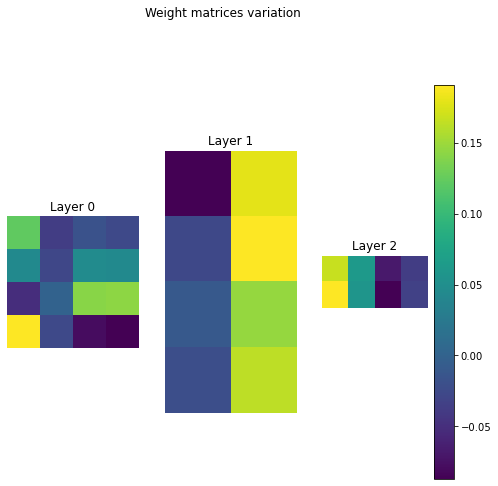

In [111]:
# Plot the variation
def show_weights_bias_diff(W1_layers, W0_layers):
    plt.figure(figsize=(8,8))
    for n in range(3):
        delta_l = W1_layers[n] - W0_layers[n]
        print(delta_l)
        print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
        ax = plt.subplot(1,3,n+1)
        plt.imshow(delta_l)
        plt.title('Layer '+str(n))
        plt.axis('off')
    plt.colorbar()
    plt.suptitle('Weight matrices variation');

show_weights_bias_diff(W1_layers, W0_layers)

#### Freeze layers at build time

In [112]:
# Count the trainable and non trainable variables before the freezing
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [113]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [114]:
# Build the model
model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones',trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])




In [115]:
# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)


In [116]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [117]:
# Retrieve weights and biases
(W2_layers,b2_layers) = get_model_weights_bias(model)



In [118]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [119]:
# Retrieve weights and biases
(W3_layers,b3_layers) = get_model_weights_bias(model)



tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float32)
Layer 0: bias variation:  0.13467579
tf.Tensor(
[[-0.13380253  0.        ]
 [-0.13326198  0.        ]
 [-0.13303688  0.        ]
 [-0.13242638  0.        ]], shape=(4, 2), dtype=float32)
Layer 1: bias variation:  0.1035129
tf.Tensor(
[[ 0.09667706  0.13817757 -0.10950482  0.05844304]
 [ 0.          0.          0.          0.        ]], shape=(2, 4), dtype=float32)
Layer 2: bias variation:  0.22373053


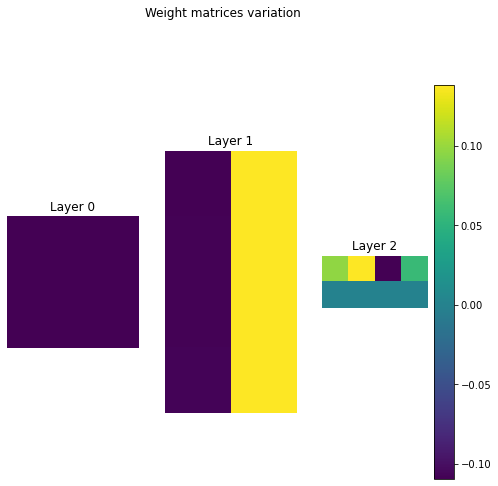

In [120]:
# Plot the variation
show_weights_bias_diff(W3_layers, W2_layers)


#### Freeze layers of a pre-built model

In [121]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [122]:
# Freeze the second layer
model.layers[1].trainable=False


In [123]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [124]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [125]:
# Retrieve weights and biases
(W4_layers,b4_layers) = get_model_weights_bias(model)



tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float32)
Layer 0: bias variation:  0.13467579
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
Layer 1: bias variation:  0.1035129
tf.Tensor(
[[ 0.02549185  0.09578776 -0.08729914 -0.01189179]
 [ 0.          0.          0.          0.        ]], shape=(2, 4), dtype=float32)
Layer 2: bias variation:  0.22373053


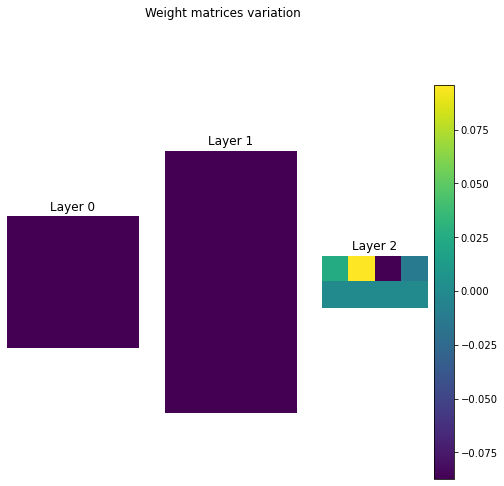

In [126]:
# Plot the variation
show_weights_bias_diff(W4_layers, W3_layers)



In [147]:
# Define simple tests to time computation speed

import time

def time_matadd(x):
    start = time.time()
    for loop in range(10):
        tf.add(x, x)
    result = time.time()-start
    print("Matrix addition (10 loops): {:0.2f}ms".format(1000*result))


def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)
    result = time.time()-start
    print("Matrix multiplication (10 loops): {:0.2f}ms".format(1000*result))

In [148]:
# Force execution on CPU

print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matadd(x)
    time_matmul(x)

On CPU:
Matrix addition (10 loops): 3.93ms
Matrix multiplication (10 loops): 45.75ms


In [149]:
# Force execution on GPU #0 if available

if tf.config.experimental.list_physical_devices("GPU"):
    print("On GPU:")
    with tf.device("GPU:0"): 
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matadd(x)
        time_matmul(x)

On GPU:
Matrix addition (10 loops): 1.26ms
Matrix multiplication (10 loops): 1.06ms
